In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [3]:
# Load data
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

In [4]:
# Split into train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Default SVR (RBF kernel)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

SVR()

In [7]:
# Predictions
y_pred = svr.predict(X_test_scaled)

In [8]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

print("Baseline SVR Performance:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Baseline SVR Performance:
MSE: 0.3570
RMSE: 0.5975
R²: 0.7276


In [11]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1],          # Regularization strength
    'epsilon': [0.01, 0.1],     # Margin of tolerance
    'gamma': ['scale', 'auto']       # Kernel coefficient
}

# Use 5-fold cross-validation
svr_grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.6s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.6s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.8s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   7.7s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   7.7s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   7.8s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   7.9s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   8.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   5.1s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   7.4s
[CV] END .....C=0.1, epsilon=0.01, gamma=auto, k

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'epsilon': [0.01, 0.1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [12]:
# Best parameters
print("Best Parameters:", svr_grid.best_params_)

Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [13]:
# Retrain Optimized SVR
best_svr = svr_grid.best_estimator_
y_pred_tuned = best_svr.predict(X_test_scaled)

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned SVR Performance:")
print(f"RMSE: {rmse_tuned:.4f}")
print(f"R²: {r2_tuned:.4f}")


Tuned SVR Performance:
RMSE: 0.5975
R²: 0.7276


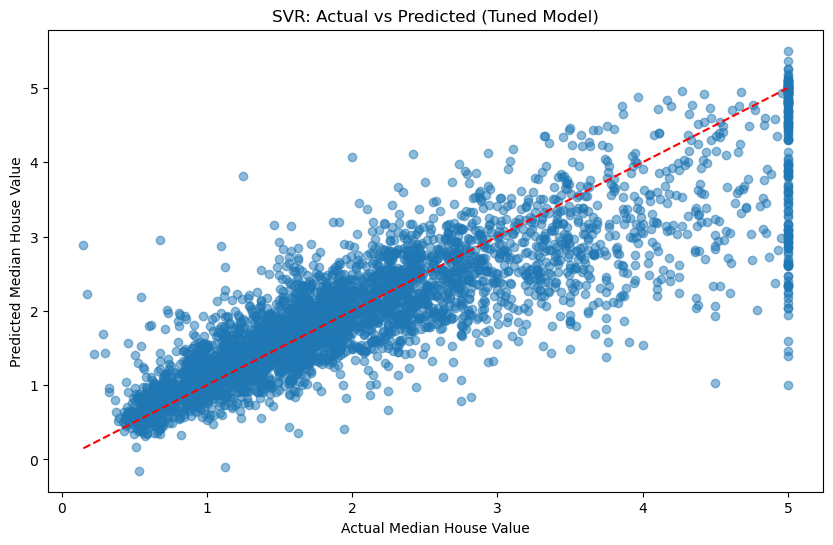

In [14]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("SVR: Actual vs Predicted (Tuned Model)")
plt.show()

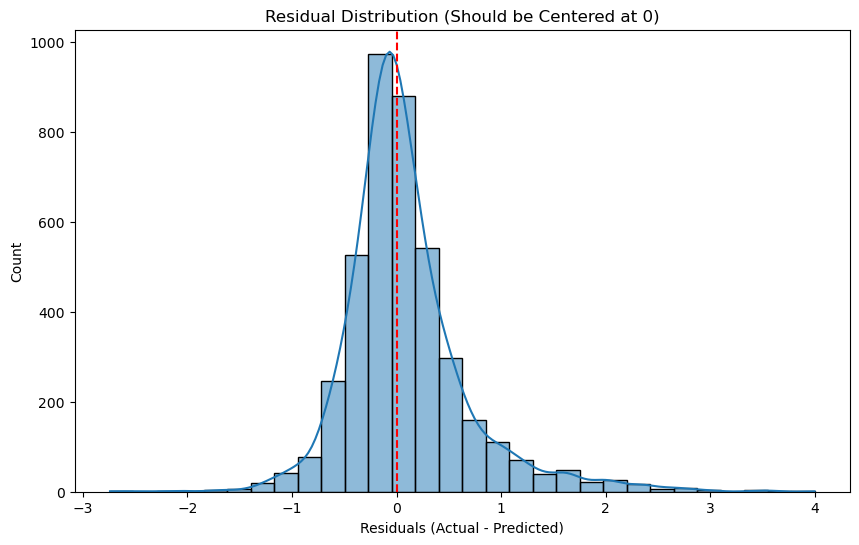

In [15]:
# Residual Plot
residuals = y_test - y_pred_tuned
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution (Should be Centered at 0)")
plt.show()